In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import random
random.seed(42)
seed = 42

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#  DATA ANALYSIS

In [9]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.600,NaN,C
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.575,NaN,S
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.250,NaN,Q
673,674,1,2,"Wilhelms, Mr. Charles",male,31.0,0,0,244270,13.000,NaN,S
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.500,NaN,S


In [10]:
test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
321,1213,3,"Krekorian, Mr. Neshan",male,25.0,0,0,2654,7.2292,F E57,C
364,1256,1,"Harder, Mrs. George Achilles (Dorothy Annan)",female,25.0,1,0,11765,55.4417,E50,C
37,929,3,"Cacic, Miss. Manda",female,21.0,0,0,315087,8.6625,NaN,S
213,1105,2,"Howard, Mrs. Benjamin (Ellen Truelove Arman)",female,60.0,1,0,24065,26.0000,NaN,S
223,1115,3,"Karlsson, Mr. Einar Gervasius",male,21.0,0,0,350053,7.7958,NaN,S


In [11]:
train.shape, test.shape

((891, 12), (418, 11))

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [18]:
#PassengerId is just reference numbers so they will be removed.
#age has also missing values
#cabin also missing values(aprox. 80% are missing values)
#Fare has missing values(only 1 missing value in the test sample)
#Embarked has missing values(only 2 missing values in the train sample)

# DATA VISUALIZATION

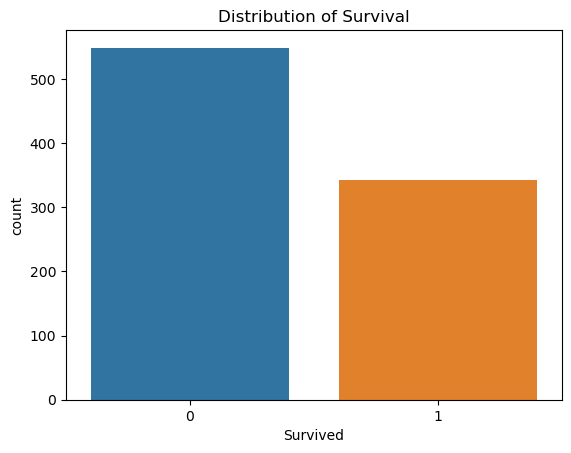

In [19]:
#distribution of the target
sns.countplot(x='Survived', data=train)
plt.title('Distribution of Survival')
plt.show()

In [20]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [21]:
train['Survived'].value_counts(normalize = True)*100


# we are analyzing the target value.

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [23]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [24]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [25]:
#SibSp and Parch are considered to be categories.

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
numeric_cols = ['Age', 'Fare']

category_cols = ['Pclass', 'Sex', 'Cabin', 'SibSp', 'Parch', 'Embarked']

In [33]:
def dis_plot(df, columns, type = 'boxplot', label = None):
    plt.figure(figsize = (12,6))
    for index, var in enumerate(columns):
        plt.subplot(3, 3, index + 1)
        if (type == 'boxplot'):
            if not label:
                g = sns.boxplot(x = var, data = df, showfliers = True)
            else:
                g = sns.boxplot(y = var, data = df, showfliers = True, x = label)
        elif (type == 'histplot'):
            if not label:
                g = sns.boxplot(x = var, data = df)
            else:
                g = sns.boxplot(x = var, data = df, hue = label)
    plt.tight_layout()

In [32]:
def count_plot(df, columns, label = None):
    plt.figure(figsize = (12,6))
    for index, var in enumerate(columns):
        plt.subplot(3, 3, index + 1)
        if not label:
            g = sns.countplot(x = var, data = df)
        else:
            g = sns.countplot(x = var, data = df, hue = label)
    plt.tight_layout()

In [38]:
#The function takes four arguments: df, columns, type and label. df is the dataframe that contains the data to be plotted. 
#columns is a list of column names that specify which variables to plot. 
#type is an optional argument that determines whether to use boxplot or histplot as the plot type. 
#label is another optional argument that specifies a categorical variable to group the data by.

In [39]:
#The output of this function is a figure with multiple subplots, each showing one variable from columns. 
#The subplots are arranged in a 3 by 3 grid by default. 
#You can use plt.figure(figsize = (width,height)) to change the figure size and plt.subplot(rows, cols, index) to change the subplot layout.

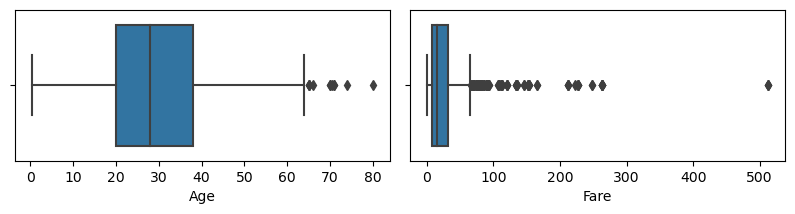

In [40]:
dis_plot(train, numeric_cols)

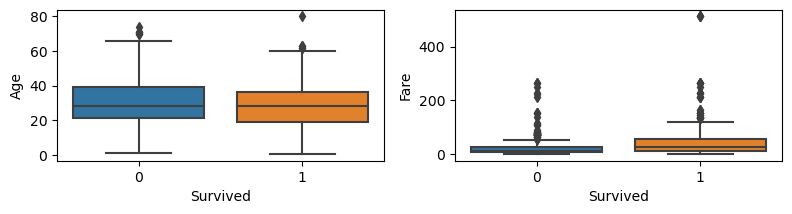

In [41]:
dis_plot(train, numeric_cols, label = 'Survived')

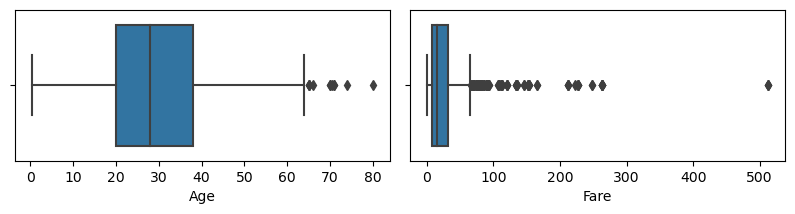

In [44]:
dis_plot(train, numeric_cols, label = 'Survived', type = 'histplot')

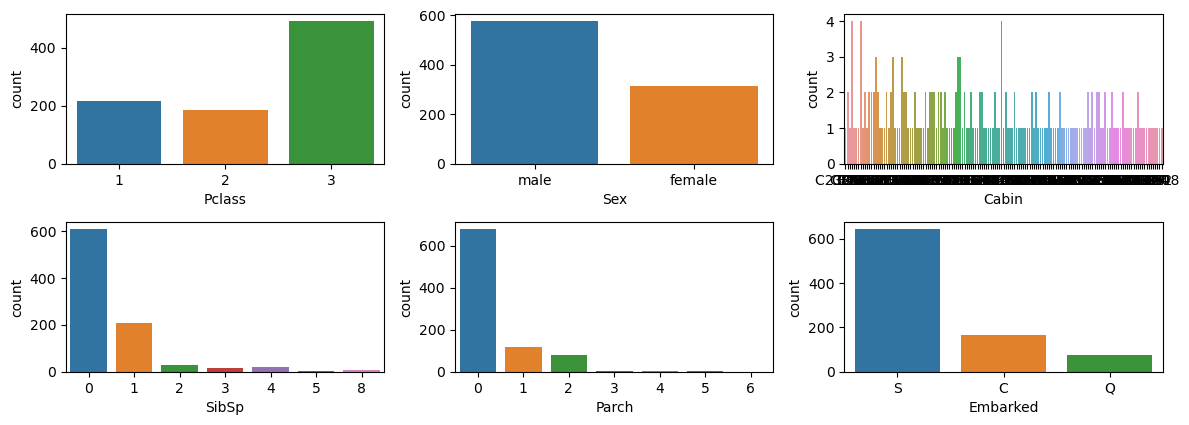

In [45]:
count_plot(train, category_cols)

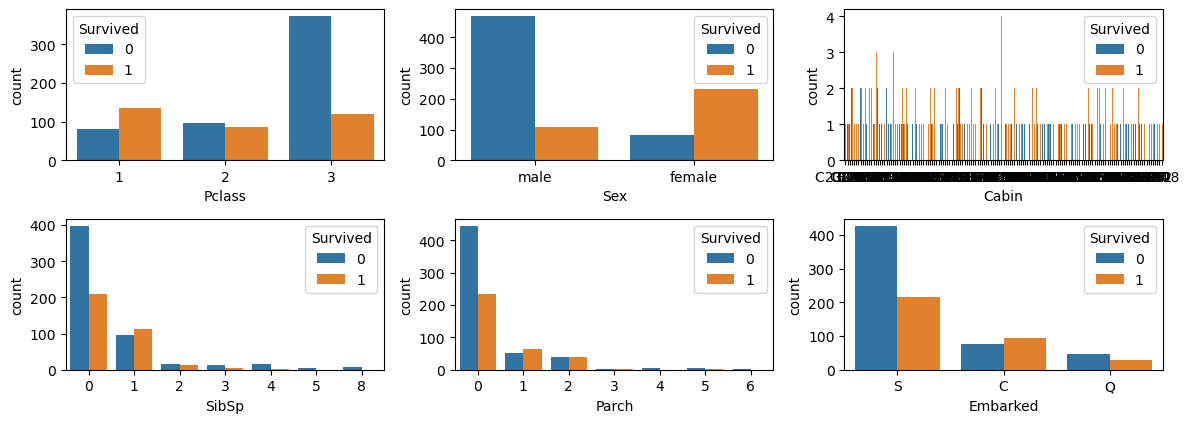

In [46]:
count_plot(train, category_cols, label = 'Survived')

In [47]:
#the data for fare id higly skewed, which means that t has a long tail on one side of the distribution. 
#This means that most of the data values are concentrated on one side of the mean, while a few extreme values are on the other side. 
#Skewed data can affect statistical models by making them less accurate or effective.
#For example, skewed data can make the mean a poor measure of central tendency, or it can make regression models sensitive to outliers

In [48]:
#male to female ratio survival is 1:2, which means that the double females survived compared to males.

In [49]:
#majority of the deceased passengers are at Pclass 3 , that maybe means that they don't have a cabin.
#we need to do a further investigation to see if we could utilize the cabin.

In [50]:
#if the passenger embarked his or her journey from Cherbourg, there is a lot fo chance of survival.

In [51]:
#passengers deceased are more likely at the age of 20-40, however the survived count is also better there as more passengers are from that range.

In [66]:
#let's alculate the percentage of a variable within a group
#The function takes three arguments: df, by and agg. df is the dataframe that contains the data to be analyzed. 
#by is a column name that specifies which variable to group the data by. 
#agg is another column name that specifies which variable to calculate the percentage of.



def percentage_calc(df, by, agg):
    temp = df.groupby([by])[agg].transform('sum')
    pct = round((df[agg]/temp) * 100, 2).astype('str') + '%'
    return pct


#The output of this function is a series of percentages for each value of agg within each group of by. 
#The function uses df.groupby([by])[agg].transform(‘sum’) to get the total sum of agg for each group, and then divides df[agg] by that sum to get the ratio.
#Then it multiplies by 100 and rounds to two decimal places. Finally, a ‘%’ sign and converts to string type.
    

In [78]:
#The function takes four arguments: df, grp_cols, agg_func and temp. 
#df is the dataframe that contains the data to be grouped. 
#grp_cols is a list of column names that specify which variables to group the data by. 
#agg_func is an optional argument that determines which aggregation function to use for the group, such as count, sum or mean. 
#temp is another optional argument that specifies which column to apply the aggregation function on.



def create_group(df, grp_cols, agg_func = 'count', temp = 'PassengerId'):
    df_grp = df.groupby(grp_cols).aggregate({temp:agg_func}).reset_index()
    grp_cols.append('Agg')
    df_grp.columns= grp_cols
    return df_grp

# male vs female survival stats

In [79]:
train_sex_grp = create_group(train, ['Sex', 'Survived'])

In [82]:
train_sex_grp['PCT'] = percentage_calc(train_sex_grp, 'Sex', 'Agg')

train_sex_grp

##almost 75% of females survived  whereas more than 80% of males died.

,Sex,Survived,Agg,PCT
0,female,0,81,25.8%
1,female,1,233,74.2%
2,male,0,468,81.11%
3,male,1,109,18.89%


In [83]:
train_class_grp = create_group(train, ['Pclass', 'Survived', 'Sex'])

train_class_grp['PCT'] = percentage_calc(train_class_grp, 'Pclass', 'Agg')

train_class_grp

,Pclass,Survived,Sex,Agg,PCT
0,1,0,female,3,1.39%
1,1,0,male,77,35.65%
2,1,1,female,91,42.13%
3,1,1,male,45,20.83%
4,2,0,female,6,3.26%
5,2,0,male,91,49.46%
6,2,1,female,70,38.04%
7,2,1,male,17,9.24%
8,3,0,female,72,14.66%
9,3,0,male,300,61.1%


In [84]:
#most of the deceased are from lower class - 25% of all deaths.

#more than 60% survived passengers boarded from upper class.

#more than 40% survived passengers that boarded from upper class are females.

#in the middle class more that 40% of passengers that survived are females, or even in lower class almost 15% of the survived are females too.


#hence we reach to the conclusion that being a female from Pclass 1 & 2 , you can increase significantly the percentage survival rate.

In [91]:
cabin_null = train.loc[(train['Cabin'].isnull()) & (train['Sex'] == 'male')]

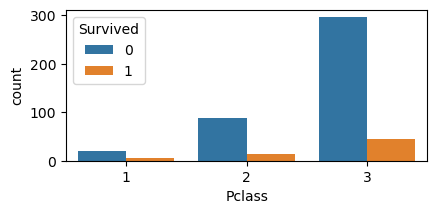

In [93]:
count_plot(cabin_null, ['Pclass'], label = 'Survived')

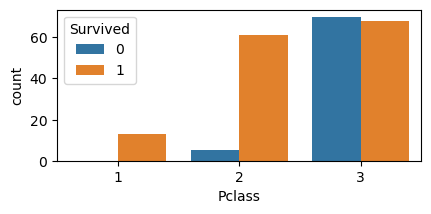

In [94]:
cabin_null = train.loc[(train['Cabin'].isnull()) & (train['Sex'] == 'female')]
count_plot(cabin_null, ['Pclass'], label = 'Survived')

In [95]:
df_cabin = train.copy()

cabins = df_cabin['Cabin']

df_cabin['Cabin_Series'] = [str(cabin)[0] for cabin in cabins]

df_cabin_surv = df_cabin.loc[df_cabin['Survived'] == 1][['Cabin_Series', 'Pclass']]

df_cabin_surv['Cabin_Series'].value_counts(normalize = True)

n    0.602339
C    0.102339
B    0.102339
D    0.073099
E    0.070175
F    0.023392
A    0.020468
G    0.005848
Name: Cabin_Series, dtype: float64

# let's do the preprocessing

In [88]:
# These classes provide a framework for creating custom transformers and estimators in scikit-learn. 
#A transformer takes input data and applies a transformation to it, while an estimator uses that transformed data to build a model.
from sklearn.base import BaseEstimator, TransformerMixin



#These classes are used for encoding categorical features into numerical features that machine learning algorithms can work with. 
#OneHotEncoder creates a binary column for each category, 
#while OrdinalEncoder encodes categories as integers.
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder



#KBinsDiscretizer is a transformer that discretizes continuous features into bins, 
#while FunctionTransformer applies a user-defined function to the input data.
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer


#SimpleImputer is used to impute missing values in the input data. 
#It replaces missing values with a specified strategy, such as the mean or median of the available values.
from sklearn.impute import SimpleImputer


#ColumnTransformer allows you to apply different transformers to different columns of the input data. 
#make_column_selector is a function that can be used to select columns based on their names or data types.
from sklearn.compose import ColumnTransformer, make_column_selector





#from sklearn.pipeline import pipeline
# the pipeline module in scikit-learn provides a way to chain together multiple transformers and estimators into a single pipeline, 
#making it easier to train and test machine learning models.

In [90]:
#Synthetic Minority Over-sampling Technique (SMOTE) algorithm from the imbalanced-learn library's over-sampling module. 
#SMOTE  deals with class imbalance in classification problems. 
#It generates synthetic samples for the minority class by interpolating between existing samples, thereby balancing the class distribution
from imblearn.over_sampling import SMOTE



#SMOTETomek is a combination of the SMOTE and Tomek Links algorithms, where Tomek Links are used to remove the overlapping samples generated by SMOTE. 
#This approach improves the performance of SMOTE by reducing noise in the synthetic samples and removing the redundant examples.
from imblearn.combine import SMOTETomek



#The Pipeline class allows you to concatenate multiple steps, such as data preprocessing and model training, into a single scikit-learn estimator object.
#This can simplify the code and make it more modular and reusable.
from imblearn.pipeline import Pipeline




#Tomek Links are pairs of samples, one from each class, that are closest to each other. 
#By removing the majority class samples in Tomek Links, Tomek Links can remove some of the noise that can arise from overlapping data points, 
#which can lead to better classification results.
from imblearn.under_sampling import TomekLinks

# split the dataset to X_train and y_train

In [96]:
y_train  = train['Survived']

X_train = train.drop(['Survived'], axis = 1)

In [97]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [100]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [101]:
#category_columns = ['PassengerId', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

numeric_columns = ['Age', 'Fare', 'Parch', 'SibSp']

# now we are going to treat the outliers

In [102]:
def outlier_treatment(X,columns):
    new_X = X.copy()
    X_treat = new_X[numeric_columns].fillna(value = 0)
    for column in columns:
        Q1 = np.percentile(X_treat[column], 25.)
        Q2 = np.percentile(X_treat[column], 50.)
        Q3 = np.percentile(X_treat[column], 75.)
        
        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
        print(upper,lower)
        
        new_X.loc[(new_X[column] < lower), column] = lower
        new_X.loc[(new_X[column] > upper), column] = upper
        
    return new_X

In [103]:
X_train[numeric_columns] = X_train[numeric_columns].fillna(value = 0)

In [104]:
X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [106]:
train_out = outlier_treatment(X_train, ['Age', 'Fare'])

78.5 -37.5
65.6344 -26.724


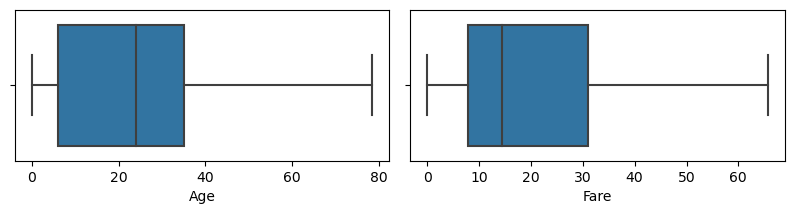

In [108]:
dis_plot(train_out, ['Age', 'Fare'])

In [109]:
train_out

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [110]:
train_out.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [111]:
class CategoryTransformer(BaseEstimator, TransformerMixin):
    def _init_(self):
        self.cols_to_remove = ['PassengerId', 'Ticket', 'Name']
        self.attr_combo = ['Cabin', 'SibSp', 'Parch']
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        temp = X.copy()
        temp['Cabin_Flag'] = temp['Cabin'].apply(lambda x: 0 if x is np.nan else 1)
        temp['Family'] = temp['SibSp'] + temp['Parch']
        for i in range(len(self.attr_combo)):
            self.cols_to_remove.append(self.attr_combo[i])
        new_X = temp.drop(self.cols_to_remove, axis = 1)
        other_cols = ['Age', 'Fare', 'Embarked', 'Sex']
        trans_X = new_X.drop(other_cols, axis = 1)
        return trans_X.to_numpy()
            

In [113]:
#cat_trans = CategoryTransformer()
#train_attr = cat_trans.transform(train_out)